# Grid World

We will be considering the following case. Policy values will be hardcoded and not a function that will calculate for any arbitrary Grid world
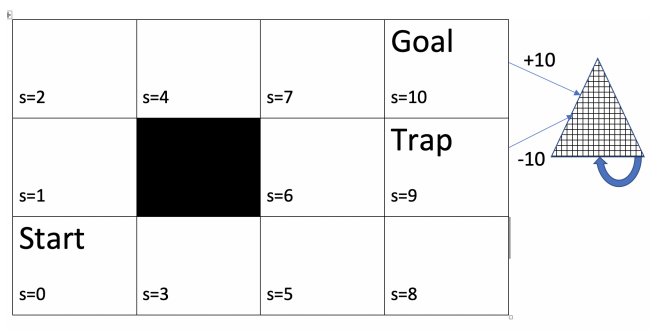

## Library Imports

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt

## Part a
Going from Goal states back to Start State for iterative policy evaluation

Transitions order is in (U,D,L,R)

In [ ]:
transitions = [
	[1,0,0,3], 		#s0
	[2,0,1,1], 		#s1
	[2,1,2,4], 		#s2
	[3,3,0,5], 		#s3
	[4,4,2,7], 		#s4
	[6,5,3,8], 		#s5
	[7,5,6,9], 		#s6
	[7,6,4,10], 	#s7
	[9,8,5,8], 		#s8
	[11,11,11,11], 	#s9 (trap)
	[11,11,11,11], 	#s10 (goal)
	[11,11,11,11], 	#s11 (terminal state)
] 

### Reward Function
Here if we are in the goal state, our next reward is +10.\
For the trap state, it is -10.\
All other non-terminal states are -1

In [ ]:
def r(s,a):
	if s == 10:
		return 10
	if s == 9:
		return -10
	if s == 11:
		return 0
	return -1

In [ ]:
num_states = 12
num_actions = 4 
gamma = 1

Evaluation Function

In [ ]:
def iteration(V, order):
	old_V = V.copy()
	for state in order:
		accum = 0
		for action in range(num_actions):
			accum += 0.25 * (r(state,action) + gamma * V[transitions[state][action]])
		V[state]=accum
	change = abs(V-old_V)
	assert V[11]==0, "Terminal state has nonzero value"
	return sum(change)

In [ ]:
order = list(range(num_states))

V = np.zeros(num_states)
iteration_count = 0
while iteration(V, order):
	iteration_count += 1
print(V, iteration_count)

## Part b

In [ ]:
order = list(range(num_states))
lb, ub = float('inf'), float('-inf')
for _ in range(100):
	random.shuffle(order)
	V = np.zeros(num_states)
	iteration_count = 0
	while iteration(V,order):
		iteration_count += 1
	lb = min(lb, iteration_count)
	ub = max(ub, iteration_count)
print(lb,ub)

# Value Iteration For Fun

In [ ]:
def value_iteration(V):
	new_V = np.zeros_like(V)
	new_V -= float('inf')
	for state in range(num_states):
		for action in range(num_actions):
			new_V[state] = max(new_V[state],(r(state,action) + gamma * V[transitions[state][action]]))
	change = abs(V-new_V)
	V[:] = new_V
	assert V[11]==0, "Terminal state has nonzero value"
	return sum(change)

In [ ]:
V = np.zeros(num_states)
iteration_count = 0
while value_iteration(V):
	iteration_count += 1
print(V, iteration_count)